In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import time
from helper import *

In [2]:
# enter resolution of grid in meters
grid_resolution=4000
# add the file path to each species here
species_filepath_dict={
    'amphibians': "D:\hotspot mapping\Data\AMPHIBIANS\AMPHIBIANS\AMPHIBIANS.shp",
    'reptiles': "D:\hotspot mapping\Data\REPTILES\REPTILES\REPTILES.shp",
    'mammals': "D:\hotspot mapping\Data\MAMMALS\MAMMALS\MAMMALS.shp",
}

In [3]:
# get Costa Rica map and its bounds
cr_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query('name == "Costa Rica"')
cr_polygon=cr_map['geometry'].to_list()[0]

C:\Users\Jinze Wang\AppData\Local\Temp\ipykernel_21268\1117065986.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cr_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query('name == "Costa Rica"')


In [4]:
final_dict={}
# generate grid
grid = create_grid(resolution=grid_resolution, target_polygon=cr_polygon)
for species, file_path in species_filepath_dict.items():
    species_geo = filter_species(path= file_path, target_polygon=cr_polygon)
    species_count = count_species(species_geo, grid)
    # plot_abundance(species_count,species_name=species)
    final_dict['count_{}'.format(species)]=species_count
    # break
final_df = gpd.GeoDataFrame(final_dict)

C:\Users\Jinze Wang\AppData\Local\Temp\ipykernel_21268\677260061.py:4: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  final_df['geometry']=grid
C:\Users\Jinze Wang\AppData\Local\Temp\ipykernel_21268\677260061.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cr_map=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query('name == "Costa Rica"')


Text(0.5, 1.0, 'Species Abundance in CR')

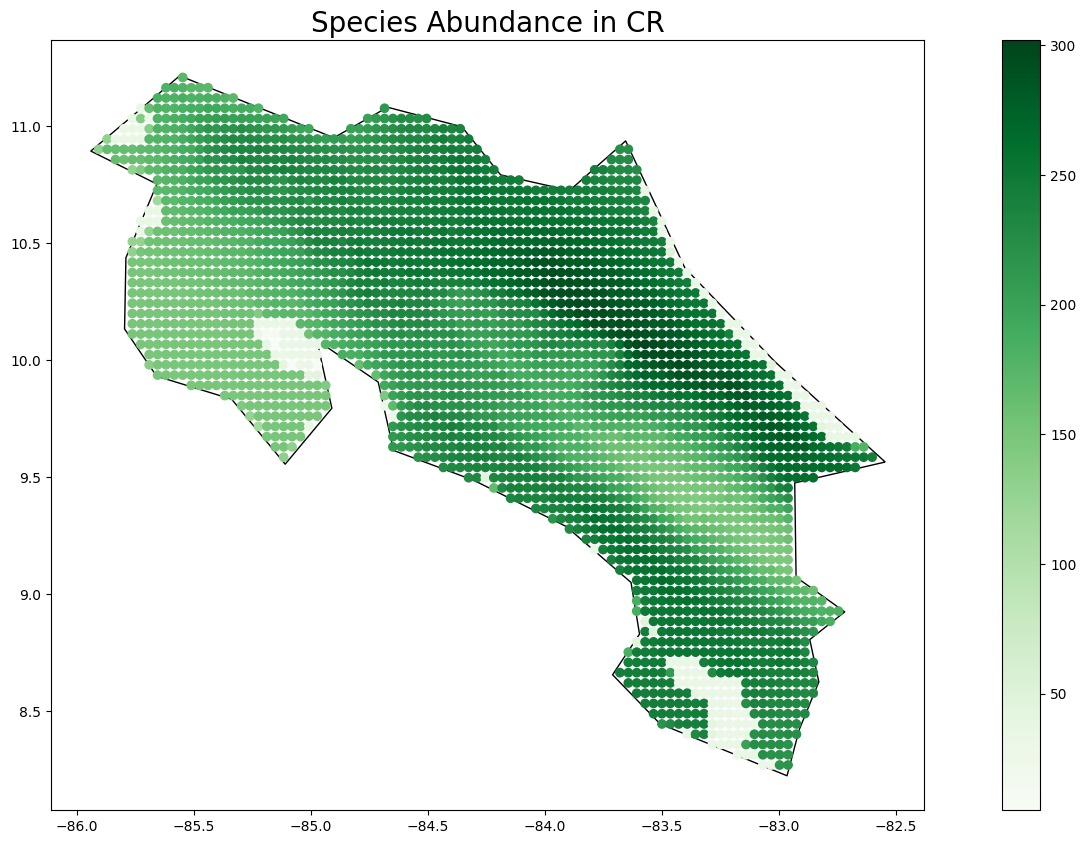

In [6]:
# get the sum of all species
final_df['species_count’']=final_df.sum(axis=1)
# add the grid to the dataframe
final_df['geometry']=grid
# plot the total species count
fig, ax = plt.subplots(figsize=(20,10))
# gpd.GeoSeries(cr_polygon).plot(ax=ax, color='white', edgecolor='black')
# plot costa rica map
cr_map=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query('name == "Costa Rica"')
cr_map.plot(ax=ax, color='white', edgecolor='black')
# use a colormap to plot the species count
final_df.plot(ax=ax, column='Total', legend=True, cmap='Greens')
# set the title
ax.set_title('Species Abundance in CR', fontsize=20)

In [9]:
# convert geometry to lat/lon
final_df['lon'] = final_df['geometry'].x
final_df['lat'] = final_df['geometry'].y

final_df

,count_amphibians,count_reptiles,count_mammals,Total,geometry,lon,lat
0,16,16,99,131,POINT (-85.90579 10.90073),-85.905793,10.900732
1,16,50,100,166,POINT (-85.86986 10.90073),-85.869861,10.900732
2,15,15,98,128,POINT (-85.86986 10.94460),-85.869861,10.944596
3,16,48,101,165,POINT (-85.83393 10.85687),-85.833929,10.856868
4,16,48,100,164,POINT (-85.83393 10.90073),-85.833929,10.900732
...,...,...,...,...,...,...,...
2809,46,18,123,187,POINT (-82.67191 9.62868),-82.671913,9.628676
2810,0,5,29,34,POINT (-82.67191 9.67254),-82.671913,9.672540
2811,47,79,124,250,POINT (-82.63598 9.58481),-82.635981,9.584812
2812,46,11,122,179,POINT (-82.63598 9.62868),-82.635981,9.628676


In [10]:
# save the data
final_df.to_csv("species_count.csv")